In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('learningSet.csv')

In [3]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


In [4]:
data.corr()['TARGET_D'].sort_values(ascending=False)

TARGET_D    1.000000
TARGET_B    0.774232
RAMNT_4     0.268811
RAMNT_21    0.099339
RAMNT_9     0.090168
              ...   
RDATE_3    -0.125194
RDATE_5    -0.220455
RAMNT_5    -0.272147
ADATE_5          NaN
ADATE_15         NaN
Name: TARGET_D, Length: 407, dtype: float64

### Check for null values in the numerical columns.

In [5]:
numerical = data.select_dtypes(include=['int64', 'float64'])
numerical.head()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0


In [6]:
null_counts = numerical.isnull().sum()
blank_counts = (numerical == ' ').sum()

combined_counts = pd.concat([null_counts, blank_counts], axis=1)
combined_counts.columns = ['Null Count', 'Blank Count']
combined_counts['Percentage'] = ((combined_counts['Blank Count'] + combined_counts['Null Count']) / len(numerical)) * 100
combined_counts.reset_index(inplace=True)
combined_counts.rename(columns={'index': 'Variable'}, inplace=True)

combined_counts.sort_values('Percentage', ascending=False, inplace=True)

print(combined_counts)

    Variable  Null Count  Blank Count  Percentage
346  RDATE_5       95403            0   99.990567
368  RAMNT_5       95403            0   99.990567
344  RDATE_3       95170            0   99.746363
366  RAMNT_3       95170            0   99.746363
345  RDATE_4       95131            0   99.705488
..       ...         ...          ...         ...
145    HUPA7           0            0    0.000000
144    HUPA6           0            0    0.000000
143    HUPA5           0            0    0.000000
142    HUPA4           0            0    0.000000
203     LFC6           0            0    0.000000

[407 rows x 4 columns]


In [7]:
data['RAMNT_4'].unique()

array([   nan,  10.  ,   1.  ,  15.  ,   5.  ,   2.  ,  25.  ,  20.  ,
         9.  ,  16.77,   3.  ,   7.  ,   4.  ,  13.  ,  50.  ,  12.  ,
        35.  ,  30.  ,  11.  ,  26.  ,  40.  ,  17.  , 100.  ,   6.  ,
        14.  ,  16.  ,   8.  ,  32.  ,  36.  ,  20.5 ,  24.  ,   7.5 ,
        18.  ])

In [8]:
for col in numerical.columns:
    if 'RAMNT' in col:
        numerical[col] = numerical[col].fillna(0)

### Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

In [9]:
print(data['GEOCODE2'].value_counts())

A    34484
B    28505
D    16580
C    15524
       187
Name: GEOCODE2, dtype: int64


In [10]:
np.random.seed(0)

dist = data['GEOCODE2'].value_counts(normalize=True)
missing = data['GEOCODE2'].isnull()

data.loc[missing,'GEOCODE2'] = np.random.choice(dist.index, size=len(data[missing]),p=dist.values)

In [11]:
print(numerical['WEALTH1'].value_counts())

9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: WEALTH1, dtype: int64


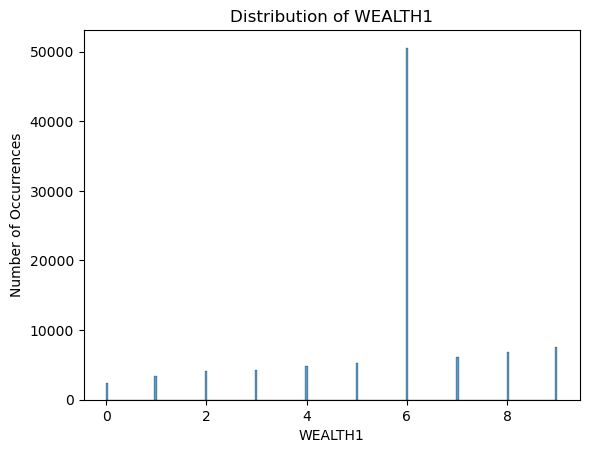

In [26]:
sns.histplot(numerical['WEALTH1'], kde=False)

plt.title('Distribution of WEALTH1')
plt.xlabel('WEALTH1')
plt.ylabel('Number of Occurrences')

plt.show()

In [12]:
median_value = numerical['WEALTH1'].median()

numerical['WEALTH1'].fillna(median_value, inplace=True)

In [13]:
print(numerical['ADI'].value_counts())

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 204, dtype: int64


In [25]:
numerical['ADI'].isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
95407    False
95408    False
95409    False
95410    False
95411    False
Name: ADI, Length: 95412, dtype: bool>

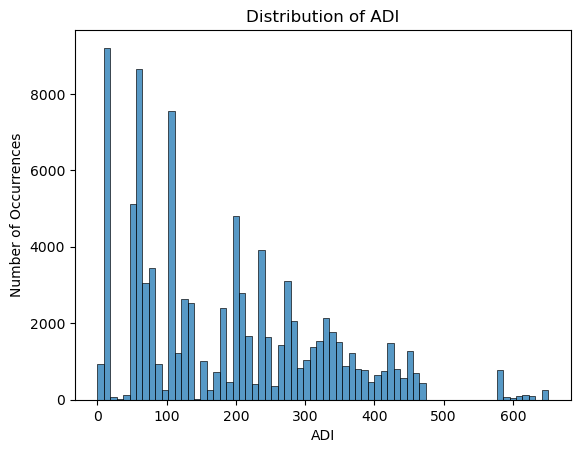

In [15]:
sns.histplot(numerical['ADI'], kde=False)

plt.title('Distribution of ADI')
plt.xlabel('ADI')
plt.ylabel('Number of Occurrences')

plt.show()

ADI does not have NANs

In [24]:
print(numerical['DMA'].value_counts())

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 206, dtype: int64


In [23]:
numerical['DMA'].isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
95407    False
95408    False
95409    False
95410    False
95411    False
Name: DMA, Length: 95412, dtype: bool>

DMA does not have any NANs

In [19]:
print(numerical['MSA'].value_counts())

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 298, dtype: int64


In [21]:
numerical['MSA'].isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
95407    False
95408    False
95409    False
95410    False
95411    False
Name: MSA, Length: 95412, dtype: bool>

MSA does not have any NANs